# Exploring the titanic 891   dataset

## Summary Statistics

The dataset used for this project was downloaded from https://github.com/datasciencedojo/datasets/blob/master/titanic.csv



In [6]:
#import packages
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#import data
df1=pd.read_csv('titanic2.csv')

In [8]:
#check data dimension
df1.shape

(891, 12)

The results shows that the data has 12 columns and 891 rows

In [9]:
#df.info

In [10]:
#check the first 5 rows of the data
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#check the last 5 rows of the data
df1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
# Check for missing values
missing_values = df1.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Print the columns with missing values and their respective counts
print(missing_counts[missing_counts > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


The above output shows that the Age, Embarked and Cabin variables has NA values which can result in poor analysis.

In [13]:
#dropping the Cabin column
df = df1.drop(columns=["Cabin"])

In [14]:
#Replacing the missing ages with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Now, 'Age' column has missing values imputed with the mean

# Check if there are any remaining missing values
missing_values_count = df['Age'].isnull().sum()
print(f"Number of missing values in 'Age' after imputation: {missing_values_count}")


Number of missing values in 'Age' after imputation: 0


In [15]:
# Check for missing values AGAIN
missing_values1 = df.isnull()

# Count the number of missing values in each column
missing_counts1 = missing_values1.sum()

# Print the columns with missing values and their respective counts
print(missing_counts1[missing_counts1 > 0])

Embarked    2
dtype: int64


In [16]:
#summary statistics to describe the distribution of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#Summary of the categorical variables
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


### Exploring the name variable

In [18]:
#sorting names
sorted(df["Name"])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [19]:
#name variable summary
df["Name"].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

The output shows that there are 418 unique names starting with Mr. Owen Harris Braund

### Exploring the sex (Gender) distribution

In [20]:
#uniqueness of the Sex variable
df["Sex"].unique()
#df["Sex"].value_counts()

array(['male', 'female'], dtype=object)

male      577
female    314
Name: Sex, dtype: int64


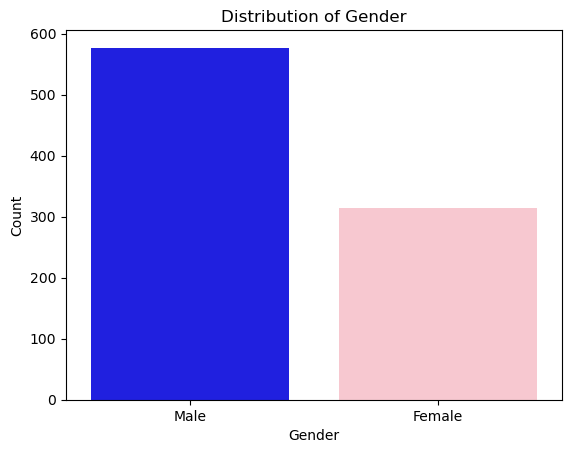

In [21]:
# Calculate the count of each Gender category
Gender_counts = df['Sex'].value_counts()
print(Gender_counts)
# visualizing gender distribution using a bar chart
sns.barplot(x=Gender_counts.index, y=Gender_counts.values, palette=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()


Out of the 418 sampled passengers, 577 were men and 314 were women

### Exploring the passengers  class

In [22]:
#displaying the type and total number of ticket classes purchased by the 418 passenges of the titanic ship  
df["Pclass"].unique()

pc = df["Pclass"].value_counts()
print(pc)

3    491
1    216
2    184
Name: Pclass, dtype: int64


According to the output:
216 passengers purchased the first class ticket,
184 passengers purchased the second class ticket and
491 passengers purchased the third class ticket as shown in the graph below

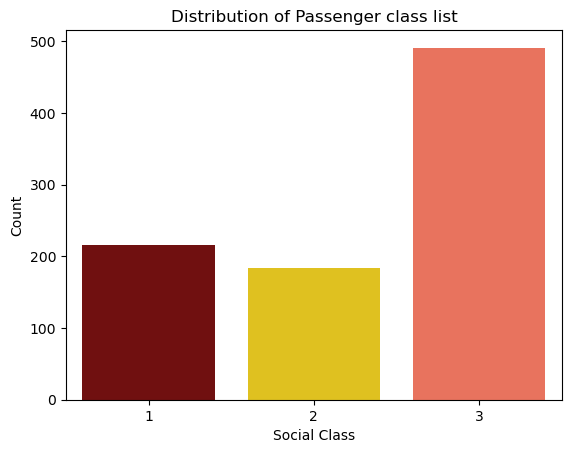

In [25]:
# visualizing the distribution of Passenger class list using a bar chart
sns.barplot(x=pc.index, y=pc.values, palette=['Maroon', 'Gold', 'Tomato'])
plt.xlabel('Social Class')
plt.ylabel('Count')
plt.title('Distribution of Passenger class list')
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])
plt.show()


### Exploring the age group variable 

In [26]:
x = df["Age"].mean()
y = df["Age"].mode()
z = df["Age"].median()
print("the mean value for the age variable is", x)
print("the modal age is", y)
print("the median value for the age variable is ", z)

the mean value for the age variable is 29.69911764705882
the modal age is 0    29.699118
Name: Age, dtype: float64
the median value for the age variable is  29.69911764705882


In [27]:
#Age group count
young = df['Age'].between(1, 18).sum()
youth = df['Age'].between(19, 45).sum()
old = df['Age'].between(46, 100).sum()

print(f"{young} out of the {len(df)} sampled passengers were young i.e 1 to 18 years")
print(f"{youth} out of the {len(df)} sampled passengers were youth i.e 19 to 45 years old")
print(f"{old} out of the {len(df)} sampled passengers were old people i.e 46 to 100 years old")

132 out of the 891 sampled passengers were young i.e 1 to 18 years
649 out of the 891 sampled passengers were youth i.e 19 to 45 years old
101 out of the 891 sampled passengers were old people i.e 46 to 100 years old


In [28]:
#who was the oldest passenger aboard the ship?
oldest = df["Age"].max()
youngest = df["Age"].min()
print(f"The oldest passenger among the {len(df)} sampled passengers on the ship was {oldest}")
print(f"The youngest passenger among the {len(df)} sampled passengers on the ship was {youngest}")

The oldest passenger among the 891 sampled passengers on the ship was 80.0
The youngest passenger among the 891 sampled passengers on the ship was 0.42


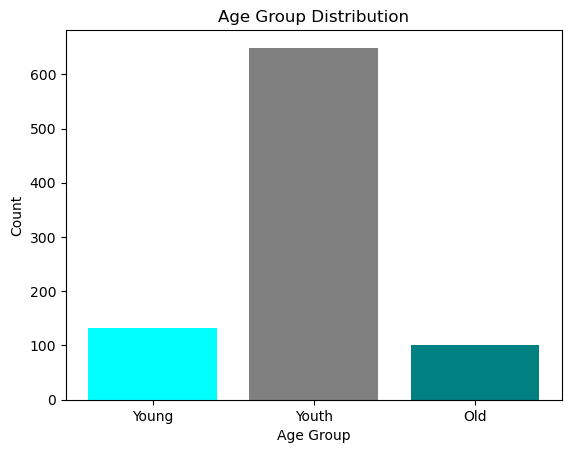

In [33]:
# Plot a bar chart
age_groups = ['Young', 'Youth', 'Old']
counts = [young, youth, old]

plt.bar(age_groups, counts, color=['aqua', 'gray', 'teal'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()


###  Exploring the Survived variable

In [34]:
#Total number of unique records from the survived variable
df["Survived"].unique()
survival_count = df["Survived"].value_counts()
print(survival_count)

0    549
1    342
Name: Survived, dtype: int64


The results shows that, out of the 891 passengers, 549 passengers died while 342 survived as represented on the graph below

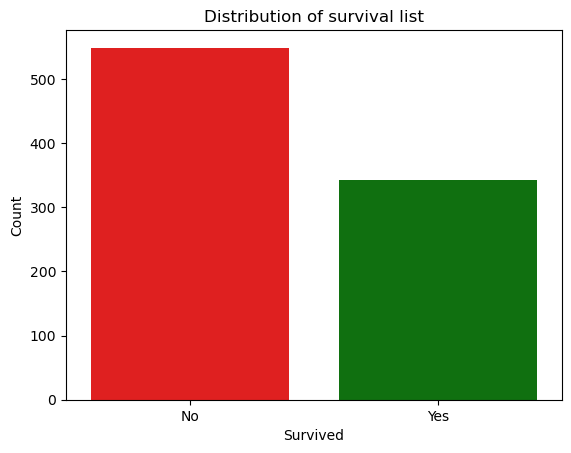

In [37]:
# visualizing the distribution of survived list using a bar chart
sns.barplot(x=survival_count.index, y=survival_count.values, palette=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of survival list')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


### Survived distribution by age group (Young, Youth, and Old)

52 out of 113 in Young did not survive
61 out of 113 in Young survived
425 out of 663 in Youth did not survive
238 out of 663 in Youth survived
72 out of 115 in Old did not survive
43 out of 115 in Old survived
Total number of youth that survived: 238


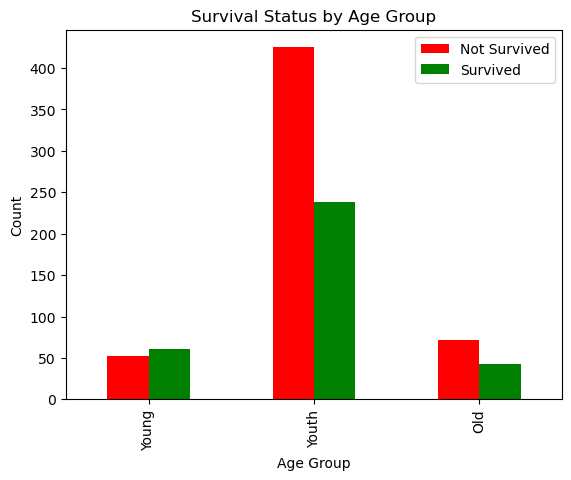

In [45]:
bins = [0, 18, 45, 100]
labels = ['Young', 'Youth', 'Old']

# Create Age Group column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and Survived, then count occurrences
age_survival_counts = df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Print counts
for age_group in labels:
    not_survived_count = age_survival_counts.loc[age_group, 0]
    survived_count = age_survival_counts.loc[age_group, 1]
    total_count = not_survived_count + survived_count
    print(f"{not_survived_count} out of {total_count} in {age_group} did not survive")
    print(f"{survived_count} out of {total_count} in {age_group} survived")

# Access and print the total number of youth that survived
youth_survived_count = age_survival_counts.loc['Youth', 1]
print(f"Total number of youth that survived: {youth_survived_count}")

# Plot a stacked bar chart
age_survival_counts.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Status by Age Group')
plt.legend(['Not Survived', 'Survived'])
plt.show()


### Survived distribution by  gender 

468 out of 577 male did not survive
109 out of 577 male survived
81 out of 314 female did not survive
233 out of 314 female survived
Total number of men that survived: 109
Total number of women that survived: 233


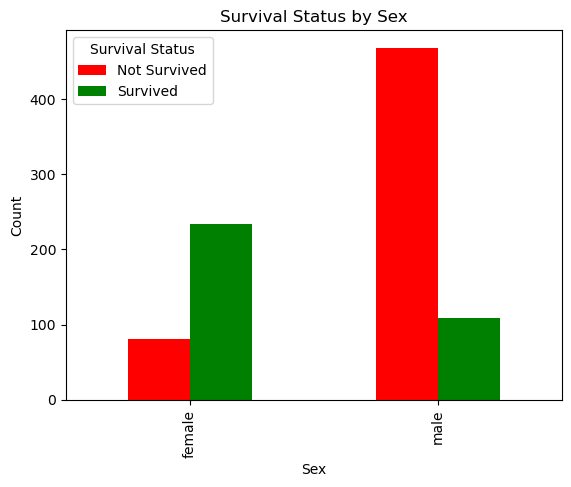

In [44]:
# Assuming you have a DataFrame called df with 'Age', 'Survived', 'Sex' columns
bins = [0, 18, 45, 100]
labels = ['Young', 'Youth', 'Old']

# Group by Age Group, Sex, and Survived, then count occurrences
grouped_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Print counts
for sex in df['Sex'].unique():
    not_survived_count = grouped_counts.loc[sex, 0]
    survived_count = grouped_counts.loc[sex, 1]
    total_count = not_survived_count + survived_count
    print(f"{not_survived_count} out of {total_count} {sex} did not survive")
    print(f"{survived_count} out of {total_count} {sex} survived")

# Access and print the total number of men that survived
men_survived_count = grouped_counts.loc['male', 1]
print(f"Total number of men that survived: {men_survived_count}")

# Access and print the total number of women that survived
women_survived_count = grouped_counts.loc['female', 1]
print(f"Total number of women that survived: {women_survived_count}")

# Plot a stacked bar chart
grouped_counts.loc[:, [0, 1]].plot(kind='bar', stacked=False, color=['red', 'green'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Status by Sex')
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()


### Survived distribution by gender and social class 

300 out of 347 male in class 3 did not survive
47 out of 347 male in cclass 3 survived
72 out of 144 female in class 3 did not survive
72 out of 144 female in cclass 3 survived
77 out of 122 male in class 1 did not survive
45 out of 122 male in cclass 1 survived
3 out of 94 female in class 1 did not survive
91 out of 94 female in cclass 1 survived
91 out of 108 male in class 2 did not survive
17 out of 108 male in cclass 2 survived
6 out of 76 female in class 2 did not survive
70 out of 76 female in cclass 2 survived
Total number of men that survived in class 3: 47
Total number of men that survived in class 1: 45
Total number of men that survived in class 2: 17
Total number of women that survived in class 3: 72
Total number of women that survived in class 1: 91
Total number of women that survived in class 2: 70


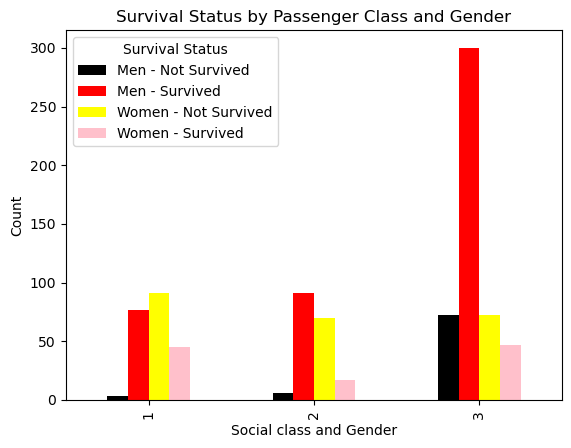

In [43]:
# Group by Pclass, Sex, and Survived, then count occurrences
grouped_counts_pclass = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

# Print counts
for pclass in df['Pclass'].unique():
    for sex in df['Sex'].unique():
        not_survived_count = grouped_counts_pclass.loc[(pclass, sex), 0]
        survived_count = grouped_counts_pclass.loc[(pclass, sex), 1]
        total_count = not_survived_count + survived_count
        print(f"{not_survived_count} out of {total_count} {sex} in class {pclass} did not survive")
        print(f"{survived_count} out of {total_count} {sex} in cclass {pclass} survived")

# Access and print the total number of men that survived in each class
for pclass in df['Pclass'].unique():
    men_survived_count = grouped_counts_pclass.loc[(pclass, 'male'), 1]
    print(f"Total number of men that survived in class {pclass}: {men_survived_count}")

# Access and print the total number of women that survived in each class
for pclass in df['Pclass'].unique():
    women_survived_count = grouped_counts_pclass.loc[(pclass, 'female'), 1]
    print(f"Total number of women that survived in class {pclass}: {women_survived_count}")

# Plot a stacked bar chart
#grouped_counts_pclass.loc[:, [0, 1]].unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
#plt.xlabel('Gender and Social class')
#plt.ylabel('Count')
#plt.title('Survival Status by Passenger Class and Gender')
#plt.legend(['Not Survived', 'Survived'], title='Survival Status')
#plt.show()


# Group by Pclass, Sex, and Survived, then count occurrences
#grouped_counts_pclass = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

# Plot a stacked bar chart
ax = grouped_counts_pclass.loc[:, [0, 1]].unstack().plot(kind='bar', stacked=False, color=['black', 'red', 'yellow', 'pink'])
plt.xlabel('Passenger class and Gender')
plt.ylabel('Count')
plt.title('Survival Status by Passenger Class and Gender')
plt.legend(['Men - Not Survived', 'Men - Survived', 'Women - Not Survived', 'Women - Survived'], title='Survival Status')
plt.show()


372 out of 491 in 3 class did not survive
119 out of 491 in 3 class survived
80 out of 216 in 1 class did not survive
136 out of 216 in 1 class survived
97 out of 184 in 2 class did not survive
87 out of 184 in 2 class survived
Total number of passengers that survived in  3class: 119
Total number of passengers that survived in  1class: 136
Total number of passengers that survived in  2class: 87


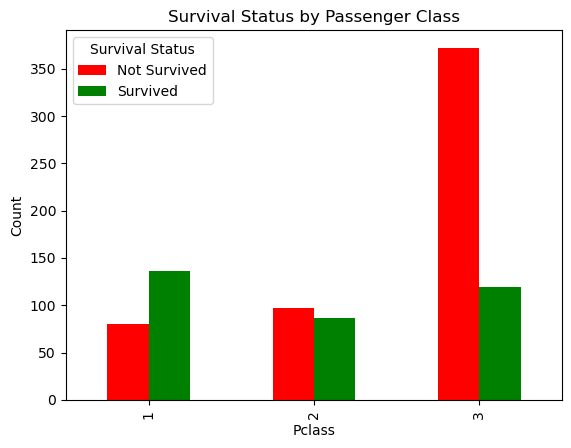

In [42]:
# Group by Pclass and Survived, then count occurrences
grouped_counts_pclass = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Print counts
for pclass in df['Pclass'].unique():
    not_survived_count = grouped_counts_pclass.loc[pclass, 0]
    survived_count = grouped_counts_pclass.loc[pclass, 1]
    total_count = not_survived_count + survived_count
    print(f"{not_survived_count} out of {total_count} in {pclass} class did not survive")
    print(f"{survived_count} out of {total_count} in {pclass} class survived")

# Access and print the total number of passengers that survived in each class
for pclass in df['Pclass'].unique():
    total_survived_count = grouped_counts_pclass.loc[pclass, 1]
    print(f"Total number of passengers that survived in  {pclass}class: {total_survived_count}")

# Plot a stacked bar chart
grouped_counts_pclass.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Status by Passenger Class')
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group by Pclass, Sex, and Survived, then count occurrences
grouped_counts_pclass = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

# Unstack the data for each survival status
unstacked_data = grouped_counts_pclass.unstack().unstack()

# Plot a bar chart
ax = unstacked_data.plot(kind='bar', color=['black', 'red', 'yellow', 'pink'], stacked=True)
plt.xlabel('Social class and Gender')
plt.ylabel('Count')
plt.title('Survival Status by Passenger Class and Gender')
plt.legend(['Men - Not Survived', 'Men - Survived', 'Women - Not Survived', 'Women - Survived'], title='Survival Status')
plt.show()
